<a href="https://colab.research.google.com/github/asedaama/Concrete_Classifier/blob/main/Concrete_Classifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = ('/content/drive/MyDrive/concreteamalu/concreteamalu')

In [ ]:
import pathlib

data_dir = pathlib.Path("/content/drive/MyDrive/concreteamalu/concreteamalu")

count = len(list(data_dir.rglob("*/*.jpg")))

In [ ]:
print(count)

40000


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os
import PIL
import h5py


In [ ]:
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width))

Found 40000 files belonging to 2 classes.
Using 32000 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width))


Found 40000 files belonging to 2 classes.
Using 8000 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Crack', 'Negative']


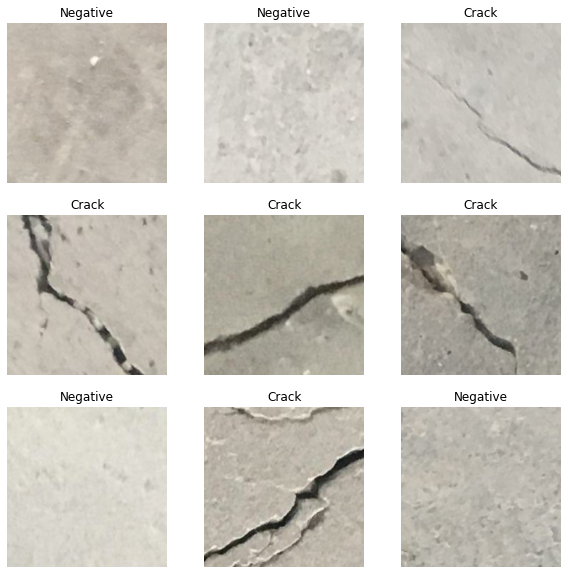

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
num_classes = 2

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,batch_size=128,
  callbacks =[earlystopping]
)

Epoch 1/10
1000/1000 [==============================] - 3172s 3s/step - loss: 0.0947 - accuracy: 0.9683 - val_loss: 0.0513 - val_accuracy: 0.9874
Epoch 2/10
1000/1000 [==============================] - 1567s 2s/step - loss: 0.0345 - accuracy: 0.9896 - val_loss: 0.0794 - val_accuracy: 0.9804
Epoch 3/10
1000/1000 [==============================] - 1567s 2s/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0231 - val_accuracy: 0.9933
Epoch 4/10
1000/1000 [==============================] - 1560s 2s/step - loss: 0.0274 - accuracy: 0.9918 - val_loss: 0.0283 - val_accuracy: 0.9914
Epoch 5/10
1000/1000 [==============================] - 1561s 2s/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0205 - val_accuracy: 0.9934
Epoch 6/10
1000/1000 [==============================] - 1553s 2s/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0225 - val_accuracy: 0.9940
Epoch 7/10
1000/1000 [==============================] - 1551s 2s/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0224 -

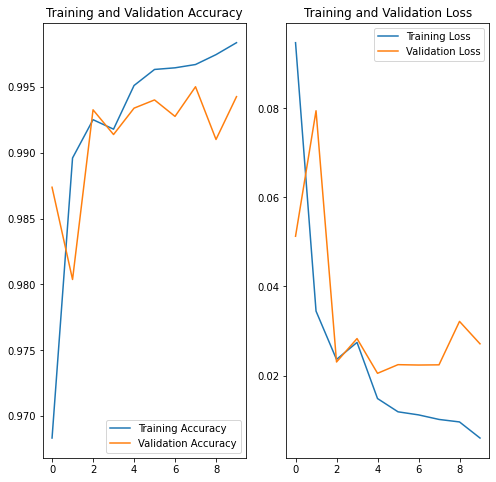

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
acc = model.evaluate(val_ds)
print('Accuracy: %.2f'%(acc[1]*100))

250/250 [==============================] - 117s 465ms/step - loss: 0.0205 - accuracy: 0.9934
Accuracy: 99.34


In [ ]:
concretecnn_dir = '/content/drive/MyDrive/ConcreteCNN/modelcnn_dir.h5'
model.save(concretecnn_dir)